### Exercício 2

Durante 2 dias consecutivos, você deverá registrar suas atividades diárias em intervalos de 30 minutos. Para cada intervalo, anote a atividade principal que estava realizando. Você pode usar categorias como:

- Estudo

- Trabalho

- Redes sociais

- Sono

- Alimentação

- Transporte

- Lazer

- Atividades físicas

- Tarefas domésticas

- Outros

Prepare formas (ao menos 2) de visualizar melhor esses dados e apresente. Como você considera que está ocupando o seu dia?

 

Você pode registrar os dados em papel, planilhas ou aplicativos simples de anotações.

![fluxo](ATV3_ex2.png)

Arquivo de exemplo 'atividades_diarias.csv' criado com sucesso.

--- Análise do Uso do Tempo ---
Total de horas gastas por atividade nos 2 dias:
Atividade
Sono                  15.0
Estudo                13.0
Lazer                  8.5
Tarefas domésticas     4.0
Alimentação            3.0
Redes sociais          2.5
Outros                 2.0

Gráfico de barras salvo como 'grafico_barras_atividades.png'
Gráfico de pizza salvo como 'grafico_pizza_atividades.png'


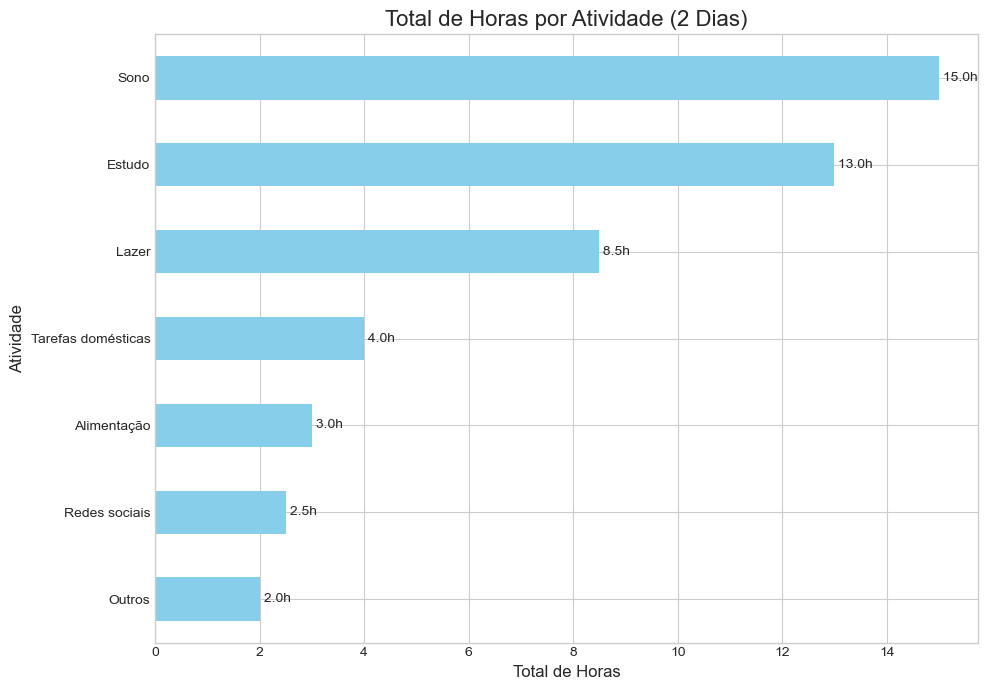

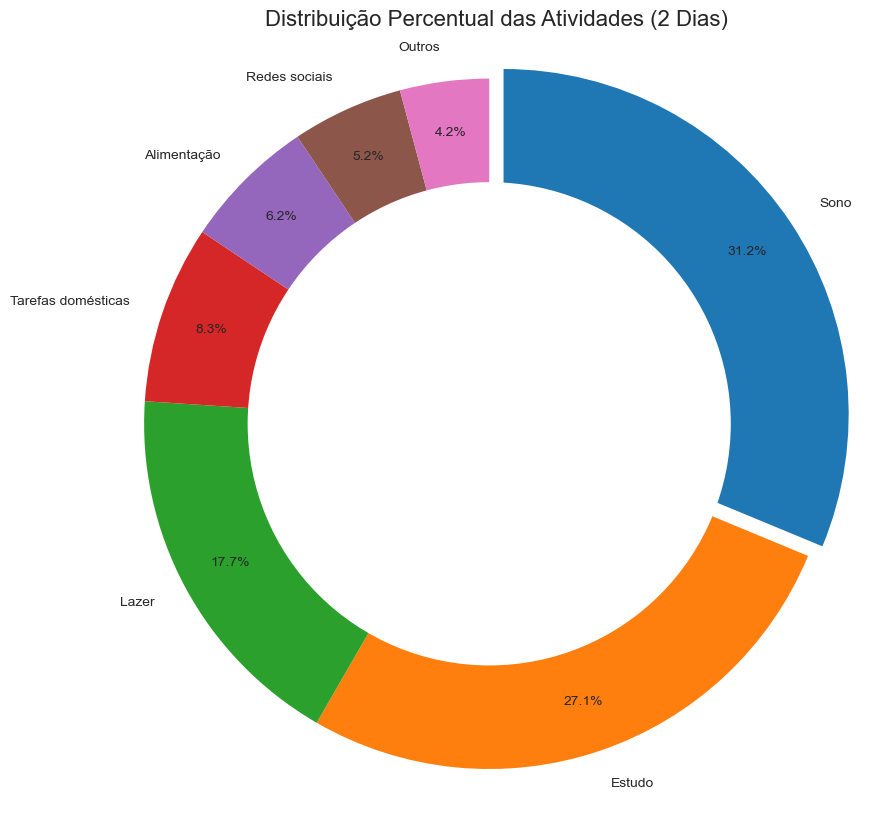

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Etapa 1: Criar um arquivo CSV de exemplo, já que nenhum foi fornecido.
# Estes dados representam 2 dias (96 intervalos de 30 minutos).
dados = {
    'Data': ['2025-06-20'] * 48 + ['2025-06-21'] * 48,
    'Hora_Inicio': [f'{h:02d}:{m:02d}' for h in range(24) for m in [0, 30]] * 2,
    'Atividade': [
        # Dia 1 (Dia de Feriado)
        'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono',
        'Outros', 'Alimentação', 'Lazer', 'Lazer','Lazer', 'Lazer', 'Lazer','Lazer','Estudo', 'Estudo', 'Estudo',
        'Estudo', 'Alimentação', 'Lazer', 'Estudo', 'Estudo', 'Estudo', 'Estudo','Estudo', 'Estudo', 'Estudo',
        'Tarefas domésticas', 'Tarefas domésticas', 'Tarefas domésticas', 'Tarefas domésticas', 'Alimentação', 'Lazer', 'Lazer', 'Lazer', 'Estudo', 'Estudo',
        'Redes sociais', 'Outros', 'Sono', 'Sono', 'Sono', 'Sono',
        # Dia 2 (Fim de semana)
        'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono', 'Sono',
        'Outros', 'Alimentação', 'Lazer', 'Lazer','Lazer','Lazer','Estudo', 'Estudo', 'Estudo', 'Estudo', 'Estudo',
        'Estudo', 'Alimentação', 'Lazer', 'Estudo', 'Estudo', 'Estudo', 'Estudo', 'Estudo', 'Estudo','Estudo',
        'Tarefas domésticas', 'Tarefas domésticas', 'Tarefas domésticas', 'Tarefas domésticas', 'Alimentação', 'Lazer', 'Lazer', 'Redes sociais', 'Redes sociais', 'Redes sociais',
        'Redes sociais', 'Outros', 'Sono', 'Sono', 'Sono', 'Sono',
    ]
}

df_exemplo = pd.DataFrame(dados)
nome_arquivo = 'atividades_diarias.csv'
df_exemplo.to_csv(nome_arquivo, index=False)

print(f"Arquivo de exemplo '{nome_arquivo}' criado com sucesso.")

# Etapa 2: Ler o arquivo CSV e processar os dados.
try:
    df = pd.read_csv(nome_arquivo)

    # Cada registro representa 30 minutos (0.5 horas).
    # Contamos quantas vezes cada atividade aparece.
    contagem_atividades = df['Atividade'].value_counts()

    # Convertendo a contagem de intervalos para horas.
    horas_por_atividade = contagem_atividades * 0.5

    print("\n--- Análise do Uso do Tempo ---")
    print("Total de horas gastas por atividade nos 2 dias:")
    print(horas_por_atividade.to_string())

    # Etapa 3: Criar e salvar as visualizações.

    # --- Visualização 1: Gráfico de Barras Horizontal ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))
    horas_por_atividade_sorted = horas_por_atividade.sort_values(ascending=True)
    horas_por_atividade_sorted.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title('Total de Horas por Atividade (2 Dias)', fontsize=16)
    ax.set_xlabel('Total de Horas', fontsize=12)
    ax.set_ylabel('Atividade', fontsize=12)
    for index, value in enumerate(horas_por_atividade_sorted):
        ax.text(value, index, f' {value:.1f}h', va='center')
    plt.tight_layout()
    plt.savefig('grafico_barras_atividades.png')
    print("\nGráfico de barras salvo como 'grafico_barras_atividades.png'")

    # --- Visualização 2: Gráfico de Pizza ---
    fig, ax = plt.subplots(figsize=(10, 10))
    explode = [0.05 if label == 'Sono' else 0 for label in horas_por_atividade.index]
    ax.pie(
        horas_por_atividade,
        labels=horas_por_atividade.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        pctdistance=0.85,
        explode=explode
    )
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax.set_title('Distribuição Percentual das Atividades (2 Dias)', fontsize=16)
    plt.axis('equal')
    plt.savefig('grafico_pizza_atividades.png')
    print("Gráfico de pizza salvo como 'grafico_pizza_atividades.png'")

except FileNotFoundError:
    print(f"Erro: O arquivo '{nome_arquivo}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Segundo a OMS, é recomendado dormir ao menos 8 horas por dia, logo o gastar quase um terço do dia dormindo é recomendado. A segunda componente mais frequênte é o estudo o que é adequado para um aluno de iniciação científica. Logo, acredito que uso bem o meu tempo.